In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')

In [5]:
train = train_df.drop('ID',axis=1)
test = test_df.drop('ID',axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


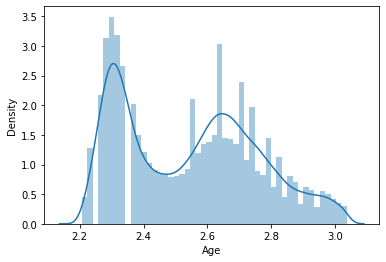

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


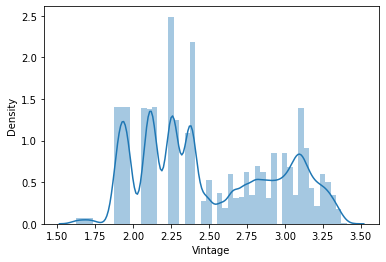

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


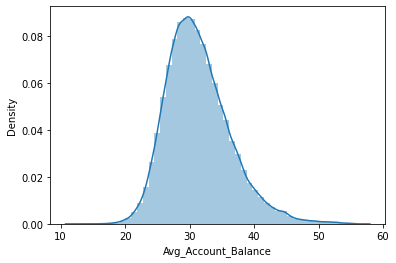

In [7]:
df = train
num_cols = df.dtypes[df.dtypes != np.object].index.values.tolist()
for c in num_cols:
  if c != 'Is_Lead':
    df[c] = np.sqrt(df[c])
    sns.distplot(df[c])
    plt.show()


In [10]:
df.Credit_Product = df.Credit_Product.fillna('Unknown')

In [29]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [13]:
from catboost import CatBoostClassifier,Pool

In [18]:
cat_features_index = [i for i,v in enumerate(df.columns) if v in df.select_dtypes('object').columns]

In [32]:
cat_features_index

[0, 2, 3, 4, 6, 8]

In [33]:
params = {
    'cat_features': cat_features_index,
    'eval_metric': 'AUC'
}

In [41]:
model = CatBoostClassifier(**params)
model.fit(X_train,y_train, plot=True, verbose=False, eval_set=(X_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))